# Trade Policy Shocks and Business Implications

## Executive Summary

This project examines how a major U.S. tariff implementation altered international trade patterns and explores the downstream business implications using freight activity as an operational signal.  The analysis focuses on China as a primary case study, validated through cross-country comparisons, and applies time-series techniques to distinguish pre- and post-policy behavior.  By combining trade data with Port of Los Angeles container throughput, this project demonstrates how policy decisions can ripple through supply chains, impacting logistics planning, transportation demand, and operational risk.

## Business Context

Trade policy changes introduce uncertainty into supply chains by altering sourcing costs, volumes, and timing.  For businesses involved in manfacturing, logistics, transportation, or retail, these changes affect:

• Inventory planning
• Freight demand
• Capacity allocation
• Cost forecasting

This analysis treats trade policy as an external shock and evaluates how quickly and unevenly markets and operations respond.

## Data Sources

• U.S. Census International Trade data (monthly import values)
• Port of Los Angeles container statistics (TEUs), used as a freight activity proxy.

All datasets are aggregated at a monthly level to support trend and impact analysis.

## Analytical Approach

The analysis follows four steps:

1. Establish a baseline trade relationship between China and the United States
2. Identify structural changes following the tariff implementation
3. Validate observed patterns through cross-country comparison
4. Translate trade signals into operational context using freight indicators

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

TARIFF_EFFECTIVE_DATE = pd.Timestamp("2025-02-04")

## Baseline Trade Relationship: China and the United States

China represents a meaningful case study due to its scale within U.S. import activity and sensitivity to policy changes. Establishing a baseline allows observed post-tariff behavior to be evaluated against historical trade patterns rather than short-term noise. 

In other words: 
What did 'normal' look like before the policy shock?

In [4]:
df = pd.read_csv("imports_china_monthly.csv")
df.head()

,date,total_import_value
0,2022-01,1.430012e+11
1,2022-02,1.268936e+11
2,2022-03,1.418558e+11
3,2022-04,1.251819e+11
4,2022-05,1.313088e+11


In [5]:
china_raw = pd.read_csv("imports_china_monthly.csv")

china_raw["month_date"] = pd.to_datetime(china_raw["date"] + "-01")
china_raw["total_import_value"] = pd.to_numeric(china_raw["total_import_value"], errors="coerce")

china_monthly = (
    china_raw[["month_date", "total_import_value"]]
    .dropna()
    .sort_values("month_date")
)

china_monthly.head()

,month_date,total_import_value
0,2022-01-01,1.430012e+11
1,2022-02-01,1.268936e+11
2,2022-03-01,1.418558e+11
3,2022-04-01,1.251819e+11
4,2022-05-01,1.313088e+11


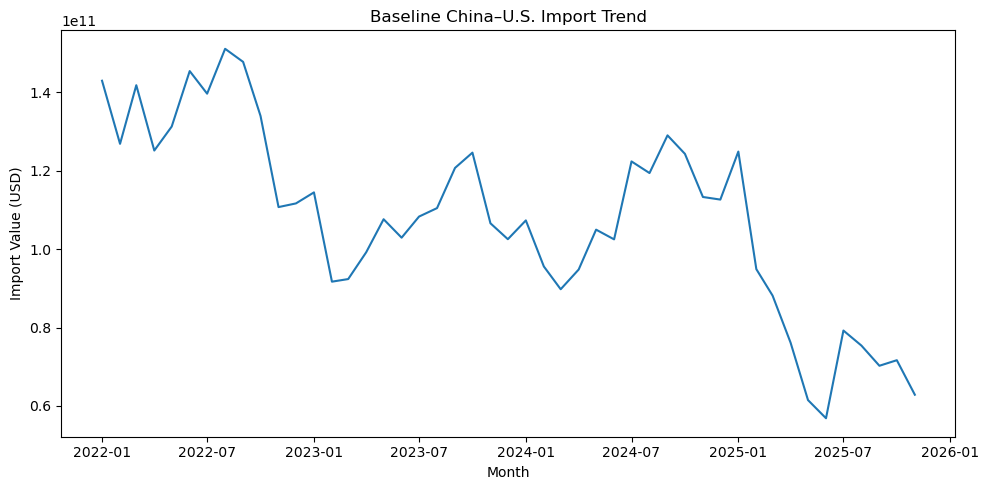

In [6]:
plt.figure(figsize=(10,5))
plt.plot(
    china_monthly["month_date"],
    china_monthly["total_import_value"],
    label="China Imports"
)

plt.title("Baseline China–U.S. Import Trend")
plt.xlabel("Month")
plt.ylabel("Import Value (USD)")
plt.tight_layout()
plt.show()

## Trade Policy Shock: Pre- and Post-Tariff Comparison

To examine how import patterns change around a specific point in time, the data is divided into periods before and after the tariff implementation date.  This time based segmentation provides a clear structure for comparing observed import behavior across the defined periods using the same dataset and measurement approach.  At this stage, no assumptions are made about cause or impact.  The purpose is to organize the data in a way that allows differences in patterns to be identified and visualized consistently.

In [8]:
# Define tariff implementation date
tariff_date = pd.Timestamp("2025-02-04")

# Create pre/post tariff label
china_monthly["period"] = china_monthly["month_date"].apply(
    lambda x: "Pre-Tariff" if x < tariff_date else "Post-Tariff"
)

china_monthly.head()

,month_date,total_import_value,period
0,2022-01-01,1.430012e+11,Pre-Tariff
1,2022-02-01,1.268936e+11,Pre-Tariff
2,2022-03-01,1.418558e+11,Pre-Tariff
3,2022-04-01,1.251819e+11,Pre-Tariff
4,2022-05-01,1.313088e+11,Pre-Tariff


In [9]:
# Normalize import values for China
china_monthly["import_norm"] = (
    (china_monthly["total_import_value"] - china_monthly["total_import_value"].mean())
    / china_monthly["total_import_value"].std()
)

china_monthly.head()

,month_date,total_import_value,period,import_norm
0,2022-01-01,1.430012e+11,Pre-Tariff,1.468413
1,2022-02-01,1.268936e+11,Pre-Tariff,0.795673
2,2022-03-01,1.418558e+11,Pre-Tariff,1.420574
3,2022-04-01,1.251819e+11,Pre-Tariff,0.724183
4,2022-05-01,1.313088e+11,Pre-Tariff,0.980075


## Post-Tariff Import Pattern: China (After Implementation)

With the tariff date established, the following visualization isolates China and U.S. import values after the implementation date.  This post period view provides a focused look at how normalized imports move over time in the months following the policy change without relying on pre-period data in the same chart. The goal is to present the observed post-tariff pattern clearly without inferring cause or impact. 

In [11]:
china_post_tariff = china_monthly[
    china_monthly["month_date"] >= tariff_date
].copy()

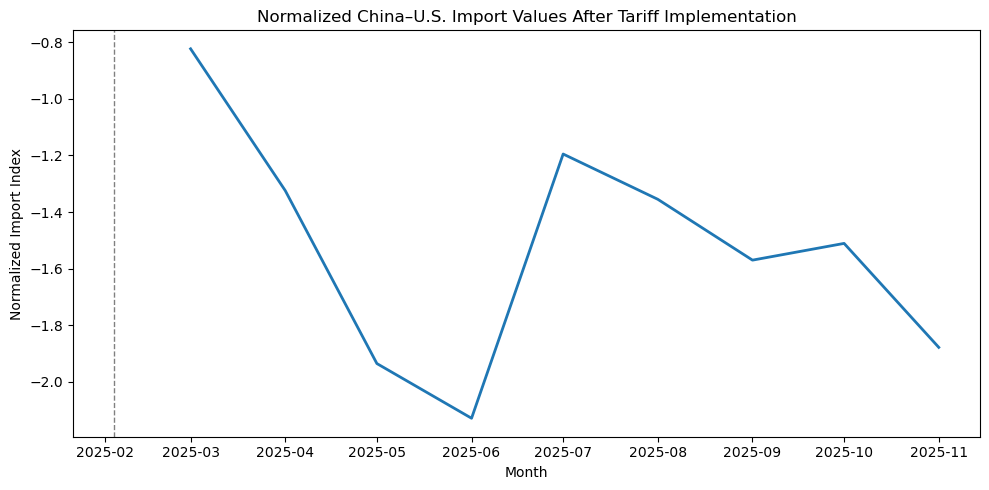

In [12]:
plt.figure(figsize=(10, 5))

plt.plot(
    china_post_tariff["month_date"],
    china_post_tariff["import_norm"],
    linewidth=2
)

plt.axvline(
    tariff_date,
    linestyle="--",
    color="gray",
    linewidth=1
)

plt.title("Normalized China–U.S. Import Values After Tariff Implementation")
plt.xlabel("Month")
plt.ylabel("Normalized Import Index")

plt.tight_layout()
plt.show()

## Pre- and Post-Tariff Import Patterns for Comparison Countries

To place the China import patterns in context, the same pre- and post tariff segmentation is applied to additional major U.S, trading partners.  Using an identical time-based structure allows import behavior across countries to be observed under the same conditions and timeframe. This section does not compare countries in terms of magnitude or performance, but presents their respective import patterns before and after the tariff date. All values are shown using the same metric and period definitions to ensure consistency in observation.

In [14]:
import pandas as pd

imports = pd.read_csv(
    "imports_monthly_by_country.csv",
    parse_dates=["month_date"]
)

imports["CTY_NAME"] = imports["CTY_NAME"].astype(str).str.upper().str.strip()
imports["import_value_usd"] = pd.to_numeric(imports["import_value_usd"], errors="coerce")

imports["CTY_NAME"].value_counts()

CTY_NAME
CANADA     191
CHINA      191
MEXICO     191
VIETNAM    191
Name: count, dtype: int64

In [15]:
comparison_countries = ["CHINA", "VIETNAM", "MEXICO", "CANADA"]

imports_compare = imports[imports["CTY_NAME"].isin(comparison_countries)].copy()

imports_compare["period"] = imports_compare["month_date"].apply(
    lambda x: "Pre-Tariff" if x < tariff_date else "Post-Tariff"
)

imports_compare_monthly = (
    imports_compare
    .groupby(["CTY_NAME", "month_date", "period"], as_index=False)
    ["import_value_usd"]
    .sum()
)

imports_compare_monthly["import_norm"] = (
    imports_compare_monthly
    .groupby("CTY_NAME")["import_value_usd"]
    .transform(lambda x: (x - x.mean()) / x.std())
)

imports_compare_monthly.head()

,CTY_NAME,month_date,period,import_value_usd,import_norm
0,CANADA,2010-01-01,Pre-Tariff,21653836333,-1.377047
1,CANADA,2010-02-01,Pre-Tariff,21233211441,-1.467789
2,CANADA,2010-03-01,Pre-Tariff,24316311419,-0.802669
3,CANADA,2010-04-01,Pre-Tariff,23656975053,-0.944909
4,CANADA,2010-05-01,Pre-Tariff,23658132044,-0.944659


In [16]:
imports = pd.read_csv(
    "imports_monthly_by_country.csv",
    parse_dates=["month_date"]
)

imports["CTY_NAME"].value_counts().head(15)

CTY_NAME
CANADA     191
CHINA      191
MEXICO     191
VIETNAM    191
Name: count, dtype: int64

In [17]:
import pandas as pd

peek = pd.read_csv("imports_monthly_by_country.csv", nrows=50000)
print("Unique countries (sample):", sorted(peek["CTY_NAME"].astype(str).str.upper().str.strip().unique())[:50])

Unique countries (sample): ['CANADA', 'CHINA', 'MEXICO', 'VIETNAM']


In [18]:
imports = pd.read_csv("imports_monthly_by_country.csv")
imports["CTY_NAME"] = imports["CTY_NAME"].astype(str).str.upper().str.strip()
print("Total unique CTY_NAME:", imports["CTY_NAME"].nunique())
print(imports["CTY_NAME"].value_counts().head(10))

Total unique CTY_NAME: 4
CTY_NAME
CANADA     191
CHINA      191
MEXICO     191
VIETNAM    191
Name: count, dtype: int64


In [19]:
comparison_countries = ["CHINA", "VIETNAM", "MEXICO", "CANADA"]

plot_df = imports.copy()

plot_df["CTY_NAME"] = plot_df["CTY_NAME"].str.upper().str.strip()
plot_df["month_date"] = pd.to_datetime(plot_df["month_date"])
plot_df["import_value_usd"] = pd.to_numeric(plot_df["import_value_usd"], errors="coerce")

plot_df = plot_df[plot_df["CTY_NAME"].isin(comparison_countries)].dropna()


In [20]:
plot_df["period"] = plot_df["month_date"].apply(
    lambda x: "Pre-Tariff" if x < tariff_date else "Post-Tariff"
)


In [21]:
plot_df = (
    plot_df
    .groupby(["CTY_NAME", "month_date", "period"], as_index=False)
    ["import_value_usd"]
    .sum()
)


In [22]:
plot_df["import_norm"] = (
    plot_df
    .groupby("CTY_NAME")["import_value_usd"]
    .transform(lambda x: (x - x.mean()) / x.std())
)


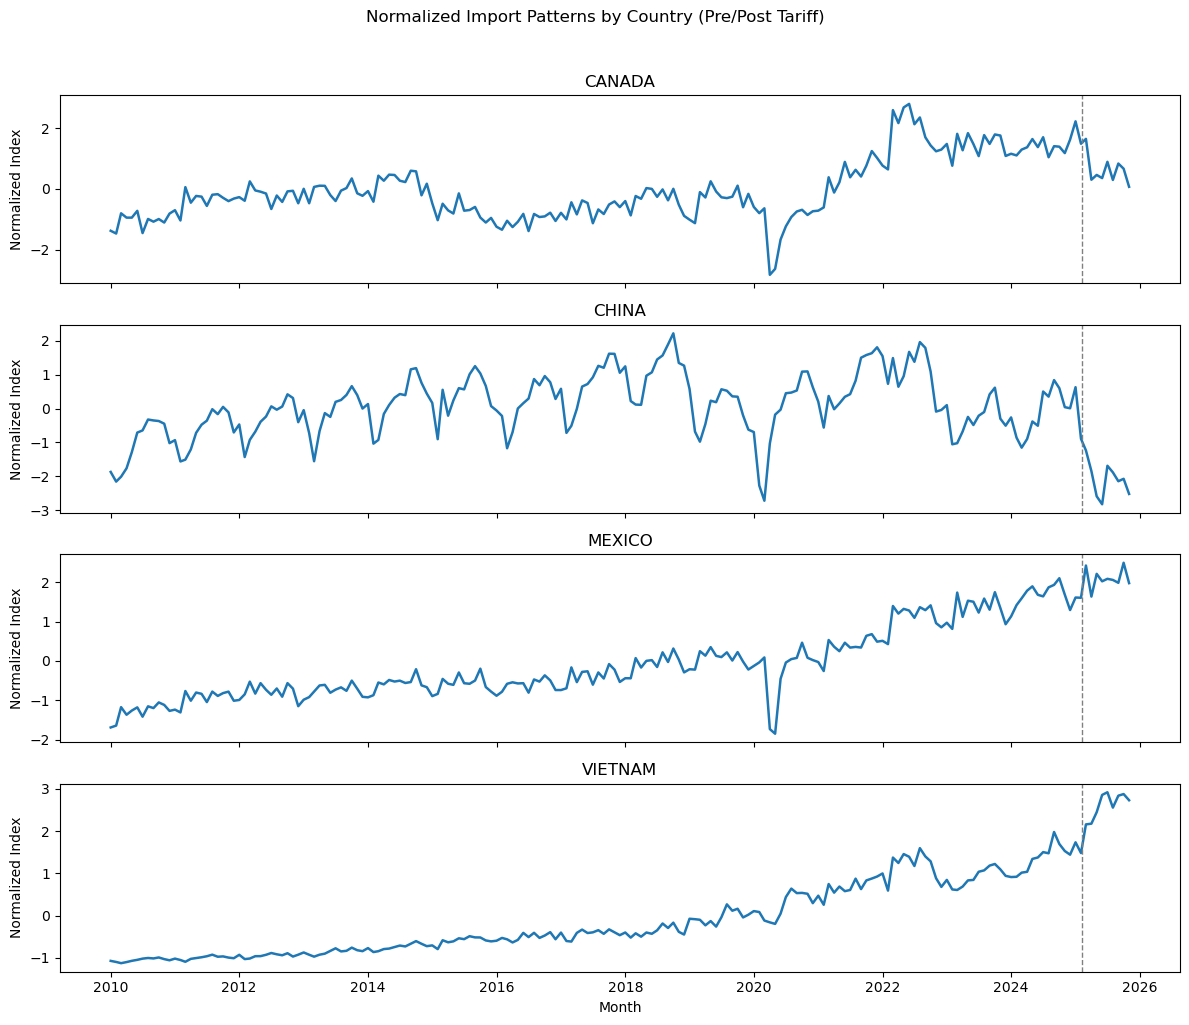

In [23]:
import matplotlib.pyplot as plt

countries = plot_df["CTY_NAME"].unique()

fig, axes = plt.subplots(len(countries), 1, figsize=(12, 10), sharex=True)

for ax, country in zip(axes, countries):
    subset = plot_df[plot_df["CTY_NAME"] == country]
    
    ax.plot(
        subset["month_date"],
        subset["import_norm"],
        linewidth=1.8
    )
    
    ax.axvline(tariff_date, linestyle="--", color="gray", linewidth=1)
    ax.set_title(country)
    ax.set_ylabel("Normalized Index")

axes[-1].set_xlabel("Month")
fig.suptitle("Normalized Import Patterns by Country (Pre/Post Tariff)", y=1.02)
plt.tight_layout()
plt.show()


## Final Summary

This project examines U.S. import patterns around a major tariff implementation using monthly trade data.  The analysis begins with a focused case study on China and is then extended to additional comparison countries (Vietnam, Mexico, and Canada) using the same analytical framework. To support comparison across countries with different trade volume, import values are normalized within each country.  This allows the analysis to highlight relative changes over time rather than differences in scale.  Imports are segmented into pre- and post-tariff peiods using a consistent cutoff date applied across all countries.  The resulting visualizations are descriptive in nature.  They illustrate how import patterns evolve before and after the tariff period across multiple trading partners without attributing causality or policy impact.  Observed changes may reflect a combination of trade policy, macroeconomic conditions, and broader supply chain dynamics. Overall, this analysis demonstrates a structured approach to time-series trade data, emphasizing data preparation, normalization, and clear communication of observed patterns. 